## ***Business Case*** -: Flight Fare Prediction
### Problem Statement
 - Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.
### Objective
- 1. Prepare a complete data analysis report on the given data.
- 2. Create a predictive model which will help the customers to predict future flight
prices and plan their journey accordingly.

## ***Domain Analysis*** 
**Domain:** Airline & Aviation, Travel Tech, E-commerce

**Attributes:**
- 1. **Airline:-** So this column will have all the types of airlines like Indigo, Jet Airways,
Air India, and many more.
- 2. **Date_of_Journey:-** This column will let us know about the date on which the
passenger’s journey will start.
- 3. **Source:-** This column holds the name of the place from where the passenger’s
journey will start.
- 4. **Destination:-** This column holds the name of the place to where passengers
wanted to travel.
- 5. **Route:-** Here we can know about what the route is through which passengers
have opted to travel from his/her source to their destination.
- 6. **Dep_Time:-** Departure time is when the passenger will leave his/her source.
- 7. **Arrival_Time:-** Arrival time is when the passenger will reach his/her destination.
- 8. **Duration:-** Duration is the whole period that a flight will take to complete its
journey from source to destination.
- 9. **Total_Stops:-** This will let us know in how many places flights will stop there for
the flight in the whole journey.
- 10. **Additional_Info:-** In this column, we will get information about food, kind of food,
and other amenities.
- 11. **Price [Target Variable]:-** Price of the flight for a complete journey including all the expenses
before onboarding.

<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    📚 Import Libraries
  </h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    Basic Data Summary and Overview
  </h2>
</div>

In [3]:
data = pd.read_excel('Flight_Fare.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [30]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [31]:
data.shape

(10683, 11)

In [32]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [33]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    🧼 Data Cleaning
  </h2>
</div>


In [5]:
# Total 2 null values we will drop it.
data.dropna(inplace=True)

In [36]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.duplicated().sum()

220

In [9]:
data[data.duplicated(keep=False)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
73,Jet Airways,24/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,7229
87,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [11]:
# Remove Exact Duplicates to avoid data leakage and model overfitting.
data.drop_duplicates(inplace=True)

In [40]:
data.duplicated().sum()

0

In [41]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    🛠️ Initial Feature Engineering and Transformation
  </h2>
</div>

- Columns like **Date_of_journey, Dep_Time, Arrival_Time** are object, so we will **convert** them to **datetime** object.

In [13]:
def datatype_to_datetime(column):
    data[column] = pd.to_datetime(data[column])

# Applying function to required coulmns.

for col in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    datatype_to_datetime(col)

In [45]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

- **Time-Spread of the data**

In [15]:
start_date = data['Date_of_Journey'].min()
end_date = data["Date_of_Journey"].max()

print(f"Start Date of Data -: {start_date}")
print(f"End Date of Data -: {end_date}")
print(f"Total Duration -: {end_date-start_date}")

Start Date of Data -: 2019-03-01 00:00:00
End Date of Data -: 2019-06-27 00:00:00
Total Duration -: 118 days 00:00:00


- As complete data is of **same year** so **we don't need year**.
- We will **only extract month and day**.

In [19]:
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month

In [21]:
# Now drop Date_of_Journey column it is of no use.
df = data.drop('Date_of_Journey', axis=1)

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-09-08 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-09-08 05:50:00,2025-09-08 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-09-08 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-09-08 18:05:00,2025-09-08 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-09-08 16:50:00,2025-09-08 21:35:00,4h 45m,1 stop,No info,13302,1,3


- Extract **hour** & **minutes** from Dep_Time and Arrival_Time.

In [25]:
def extract_hrs_min(column):
    df[column+'_hrs'] = df[column].dt.hour
    df[column+'_min'] = df[column].dt.minute

# Applying function to respective columns.

for col in ['Dep_Time','Arrival_Time']:
    extract_hrs_min(col)

In [27]:
# Drop the Dep_Time, Arrival_Time column.

df.drop(['Dep_Time','Arrival_Time'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


- Now let's **transform Duration** to **Duration_hrs** and **Duration_mins**.

In [29]:
# Function to extract hours and minutes from a duration string
def extract_duration(duration):
    parts = duration.split()
    hours = 0
    minutes = 0

    # Iterate through each part of the duration
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))

    return hours, minutes

# Creating new columns 'Duration_Hrs' and 'Duration_Mins'
df[['Duration_hrs', 'Duration_mins']] = df['Duration'].apply(extract_duration).apply(pd.Series)


In [31]:
# Drop the Duration Column.

df.drop('Duration', axis=1, inplace=True)
df.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [33]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_Day          int32
Journey_Month        int32
Dep_Time_hrs         int32
Dep_Time_min         int32
Arrival_Time_hrs     int32
Arrival_Time_min     int32
Duration_hrs         int64
Duration_mins        int64
dtype: object

- Encoding **Total_Stops** object values to int(0,1,2,3,4)

In [35]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})
df.sample()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hrs,Duration_mins
5345,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,18371,24,6,9,0,19,0,10,0


In [37]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

- **Typo** error **fix** -- ['No info'] same as ['No Info']

In [39]:
df['Additional_Info'].replace('No info', 'No Info', inplace=True)

In [41]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

- **Typo** error **fix** -- ['New Delhi'] same as ['Delhi']
- We will consider them same and make it one as New Delhi.

In [43]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [45]:
df['Destination'].replace('Delhi', 'New Delhi', inplace=True)

In [47]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [69]:
## Continuous Columns.

df.describe()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hrs,Duration_mins
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,0.802332,9026.790289,13.463200,4.701491,12.478494,24.404989,13.387689,24.719939,10.026190,28.210189
std,0.660609,4624.849541,8.467493,1.163802,5.727227,18.815719,6.855547,16.570450,8.378023,16.879185
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5224.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8266.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12344.750000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [70]:
## Categorical Columns.

df.describe(include ='object')

,Airline,Source,Destination,Route,Additional_Info
count,10462,10462,10462,10462,10462
unique,12,5,5,128,9
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,No Info
freq,3700,4345,4345,2376,8185


### Let's Jump to Visualization...
- For better Analysis.

<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    📊 E.D.A and Visualization 
  </h2>
</div>

## Univariate Analysis

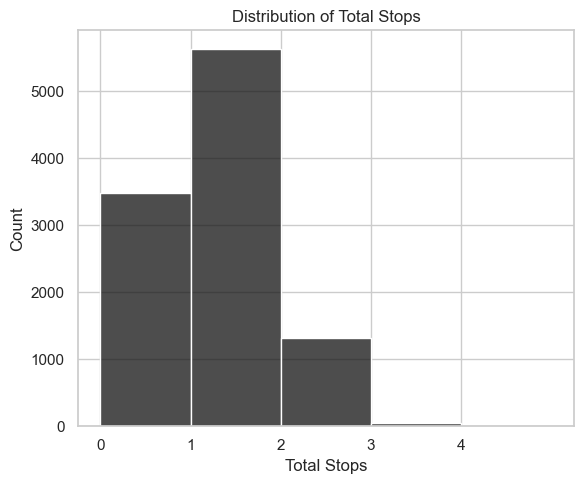

In [74]:

sns.set(style='whitegrid')
plt.figure(figsize=(6, 5))

sns.histplot(df['Total_Stops'], bins=range(6), kde=False, color='#111111')

plt.xticks([0, 1, 2, 3, 4])

plt.xlabel("Total Stops")
plt.ylabel("Count")
plt.title("Distribution of Total Stops")

plt.tight_layout()
plt.show()

- **From the above bar chart we can say that,top 3 Flights stop are--**
- 0(non-stop), 1 stop, 2 stops.

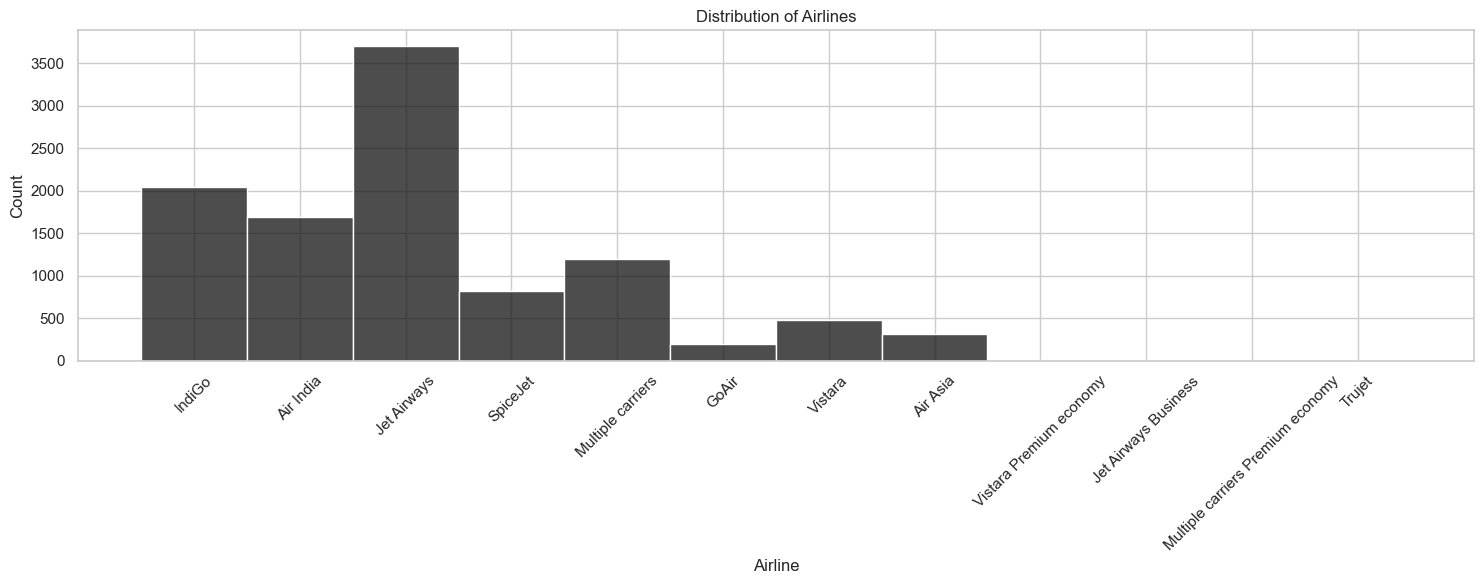

In [76]:
plt.figure(figsize=(15, 6))

sns.histplot(df['Airline'], kde=False, color='#111111')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Distribution of Airlines")

plt.tight_layout()
plt.show()

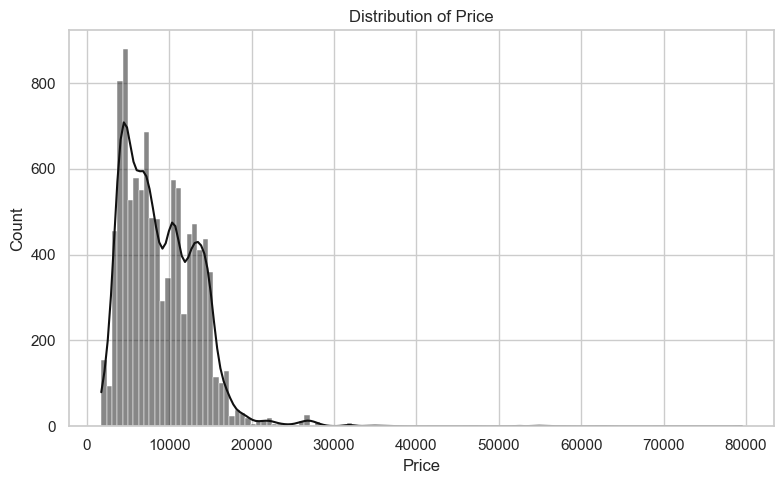

In [77]:
plt.figure(figsize=(8, 5))

sns.histplot(df['Price'], kde=True, color='#111111')
#plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Distribution of Price")

plt.tight_layout()
plt.show()

In [78]:
df.Price.max()

79512

**Insight**
- Right-Skewed Distribution (Positive Skew).

- The histogram shows a **large concentration** of flight prices between **2,000 and 15,000**.
- The tail on the right indicates fewer flights with extremely high prices (up to 80,000).
- This suggests most tickets are priced in a moderate range, with a few expensive outliers.
- The prices **above 30,000** are very rare and could be **outliers** or business class/premium fares.

- The peak (mode) is around 6,000–8,000, which appears to be the most common price range.

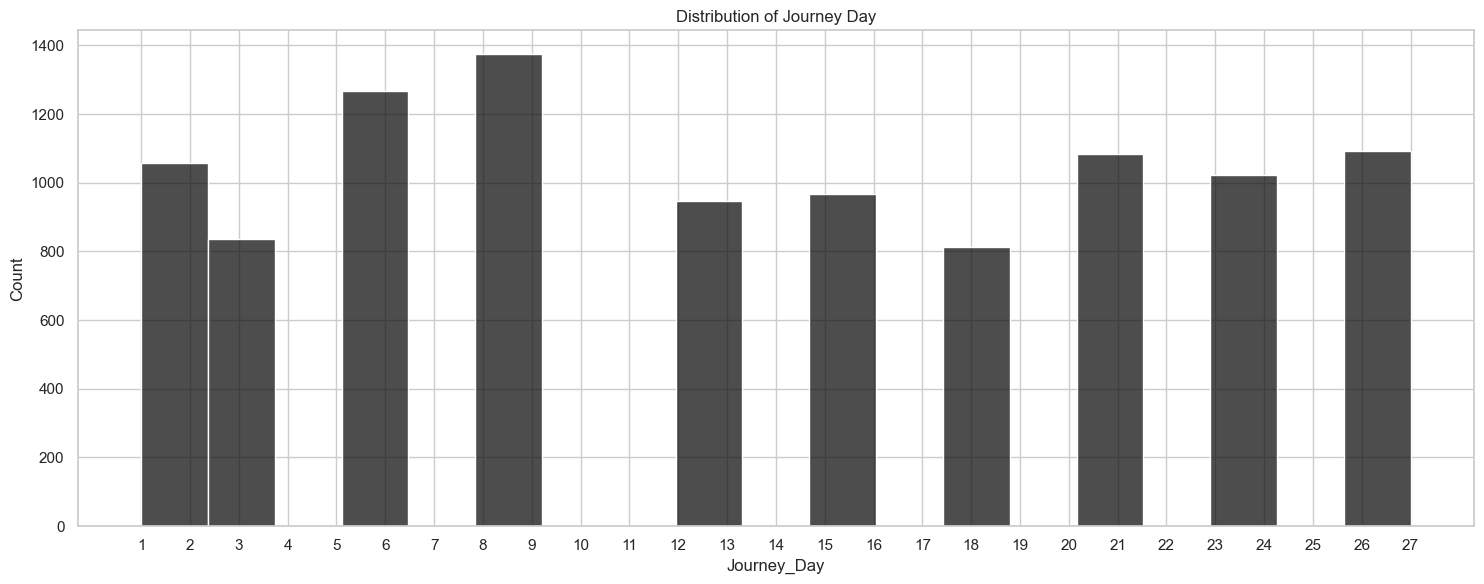

In [80]:
plt.figure(figsize=(15, 6))

sns.histplot(df['Journey_Day'], kde=False, color='#111111')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
plt.ylabel("Count")
plt.title("Distribution of Journey Day")

plt.tight_layout()
plt.show()

**Insight**
- The graph shows that there are no unusual values (outliers) in the "journey day" feature. Additionally, the data in this feature follows a clear and expected pattern.

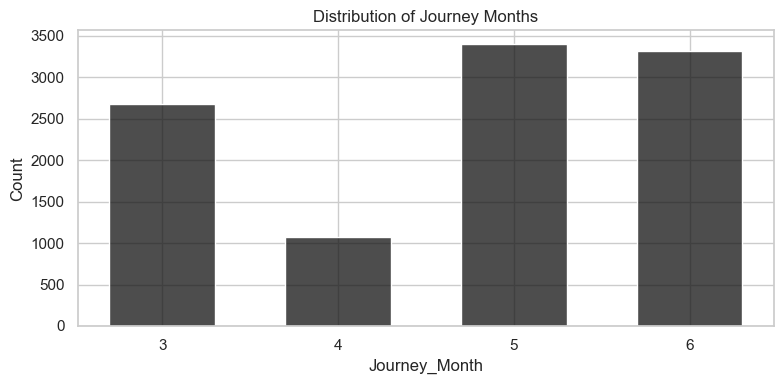

In [82]:
plt.figure(figsize=(8, 4))

sns.histplot(df['Journey_Month'], discrete=True, shrink=0.6, kde=False, color='#111111')
plt.xticks([3,4,5,6])
plt.ylabel("Count")
plt.title("Distribution of Journey Months")

plt.tight_layout()
plt.show()

**Insight**
- Journey months 5(May) and 6(June) have the highest counts, while month 4 has the lowest counts. This pattern is observed because of certain events, seasons. This can be due to **Summer Vacation**.

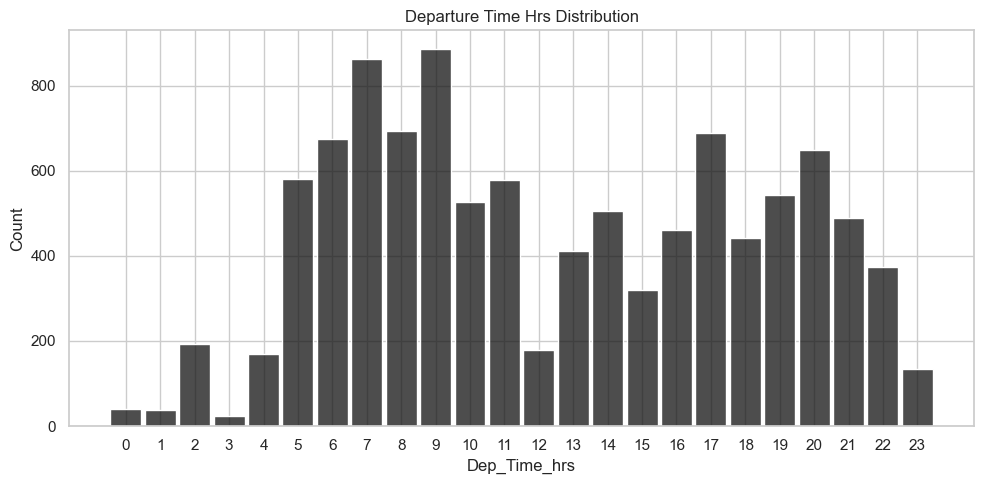

In [84]:
plt.figure(figsize=(10, 5))

sns.histplot(df['Dep_Time_hrs'], discrete=True, shrink=0.9, kde=False, color='#111111')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel("Count")
plt.title("Departure Time Hrs Distribution")

plt.tight_layout()
plt.show()

**Insight**
- There are no outliers in the dataset. The presence of flights with a departure time of 0 hours does not indicate outliers, as there is another column for departure minutes. Additionally, the majority of flights depart between 5 to 11 and 17 to 20 hours, which aligns with common flight schedules.

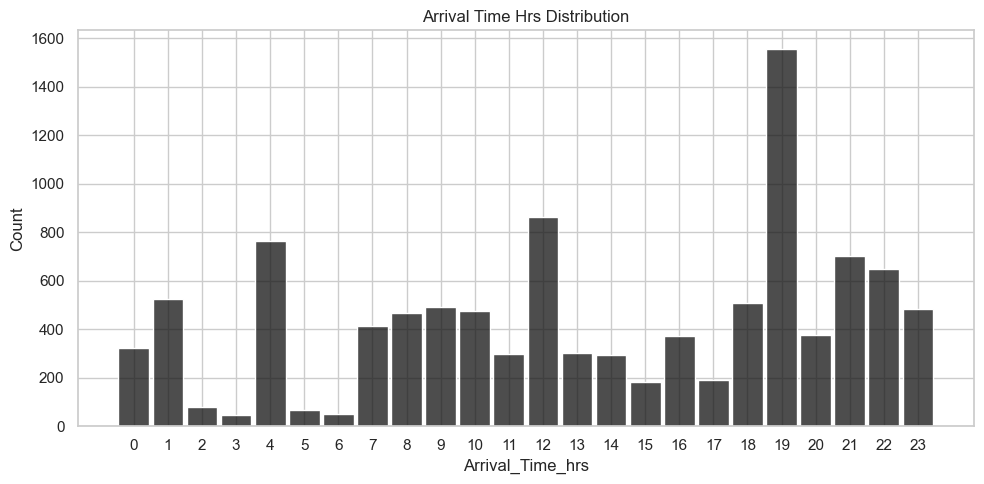

In [86]:
plt.figure(figsize=(10, 5))

sns.histplot(df['Arrival_Time_hrs'], discrete=True, shrink=0.9, kde=False, color='#111111')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel("Count")
plt.title("Arrival Time Hrs Distribution")

plt.tight_layout()
plt.show()

**Insight**
- There are no outliers in the dataset. Most flights arrive at hour 19, which is considered a reasonable time. However, hours **1 to 6** have **lower counts** of flights, possibly because these are late-night hours. It's important to note that the presence of flights with an arrival time of 0 hours does not indicate outliers, as there is another column for arrival minutes.

In [88]:
df['Duration_hrs'].max()

47

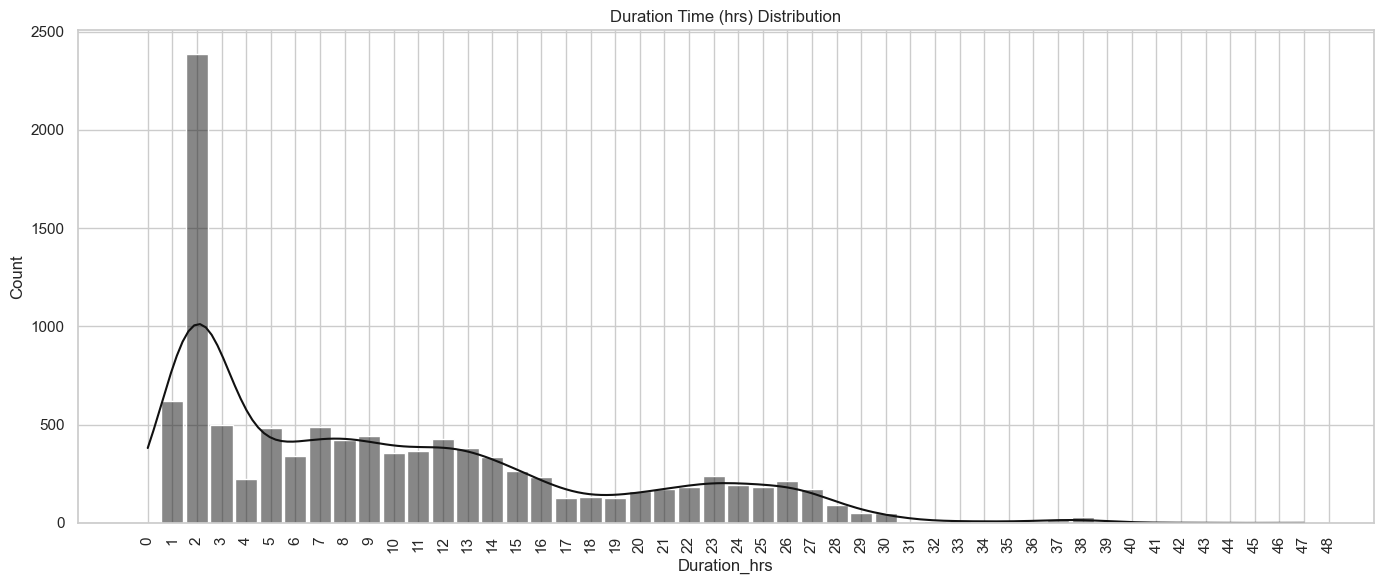

In [89]:
plt.figure(figsize=(14, 6))

sns.histplot(df['Duration_hrs'], discrete=True, shrink=0.9, kde=True, color='#111111')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Duration Time (hrs) Distribution")

plt.tight_layout()
plt.show()

**Insight**
- The duration time with **2 hours** has the **highest count** in the graph. However, there might be **some outliers** in the dataset, such as **47 hours and beyond 30 hours**. These outliers could be reasonable durations for certain trips that involve longer travel times.
- A large number of flights fall within the **1–5 hour** range, indicating **most routes** are relatively **short-haul**.

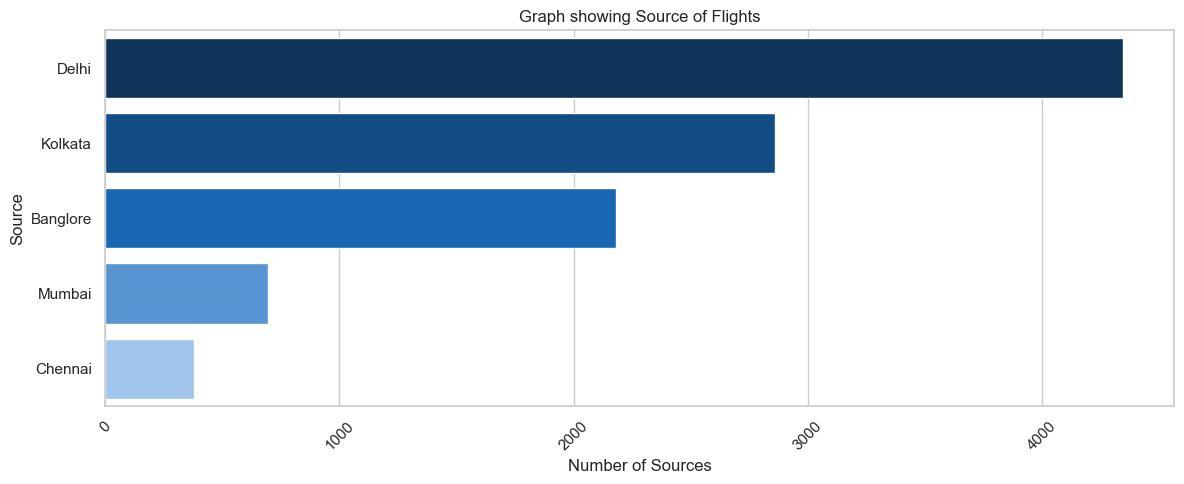

In [91]:
plt.figure(figsize=(12, 5))

# colour palette.
blue_family = ['#003366','#004D99','#0066CC','#4394E5','#92C5F9']

order_des = df['Source'].value_counts().index
sns.countplot(y = 'Source',data=df ,order=order_des, palette=blue_family)
plt.xticks(rotation=45)
plt.xlabel("Number of Sources")
plt.title("Graph showing Source of Flights")

plt.tight_layout()
plt.show()

<h3 style="color:crimson;"><center><b>From the above bar chart we can say that, top 3 sources of the flights are--</b></center></h3>
<h4 style="color:#003366;"><center><b> Delhi, Kolkata, Banglore.</b></center></h4>

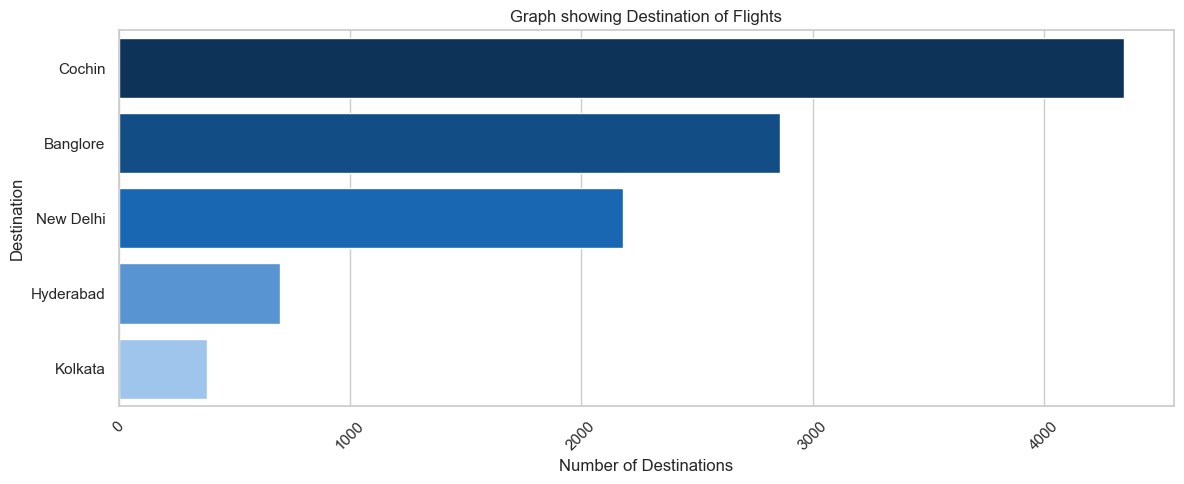

In [93]:
plt.figure(figsize=(12, 5))

# colour palette.
blue_family = ['#003366','#004D99','#0066CC','#4394E5','#92C5F9']

order_des = df['Destination'].value_counts().index
sns.countplot(y = 'Destination',data=df ,order=order_des, palette=blue_family)
plt.xticks(rotation=45)
plt.xlabel("Number of Destinations")
plt.title("Graph showing Destination of Flights")

plt.tight_layout()
plt.show()

<h3 style="color:crimson;"><center><b>From the above bar chart we can say that, top 3 destination of the flights are--</b></center></h3>
<h4 style="color:#003366;"><center><b> Cochin, Banglore, New Delhi.</b></center></h4>

In [95]:
df['Route'].nunique()

128

- As there are 128 unique route we can't plot all, so we will extract top 5 Routes.

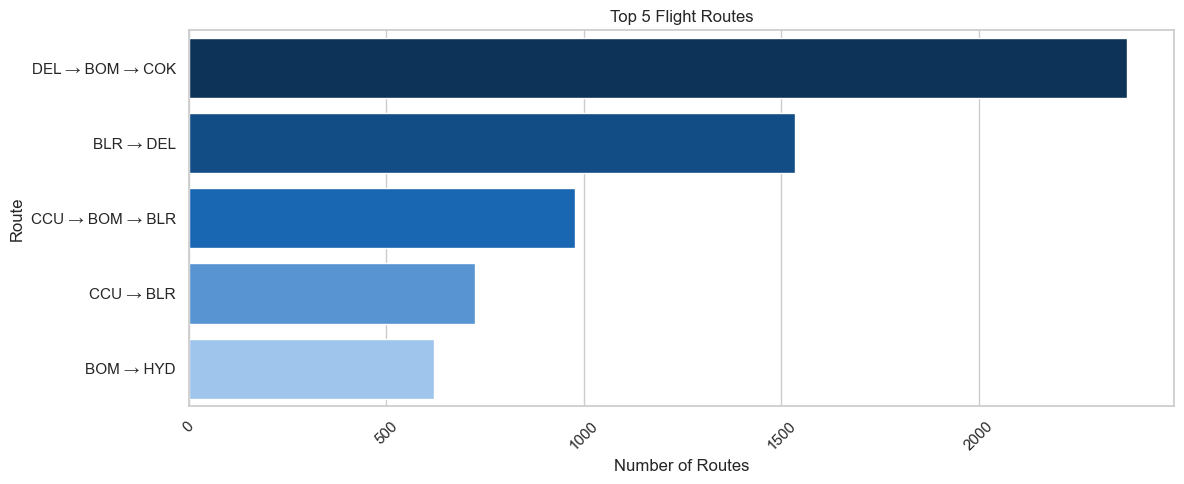

In [97]:
# Top 5 Routes

plt.figure(figsize=(12, 5))

# colour palette.
blue_family = ['#003366','#004D99','#0066CC','#4394E5','#92C5F9']

order_des = df['Route'].value_counts().head(5).index
sns.countplot(y = 'Route',data=df ,order=order_des, palette=blue_family)
plt.xticks(rotation=45)
plt.xlabel("Number of Routes")
plt.title("Top 5 Flight Routes")

plt.tight_layout()
plt.show()

 <h3 style="color:crimson;"><center><b>From the above bar chart we can say that,top 5 Flight routes are--</b></center></h3>
<h5 style="color:#003366;"><center><b>1.DEL → BOM → COK.</b></center></h5>
<h5 style="color:#004D99;"><center><b>2.BLR → DEL.</b></center></h5>
<h5 style="color:#0066CC;"><center><b>3.CCU → BOM → BLR.</b></center></h5>
<h5 style="color:#4394E5;"><center><b>4.CCU → BLR.</b></center></h5>
<h5 style="color:#92C5F9;"><center><b>5.BOM → HYD.</b></center></h5>

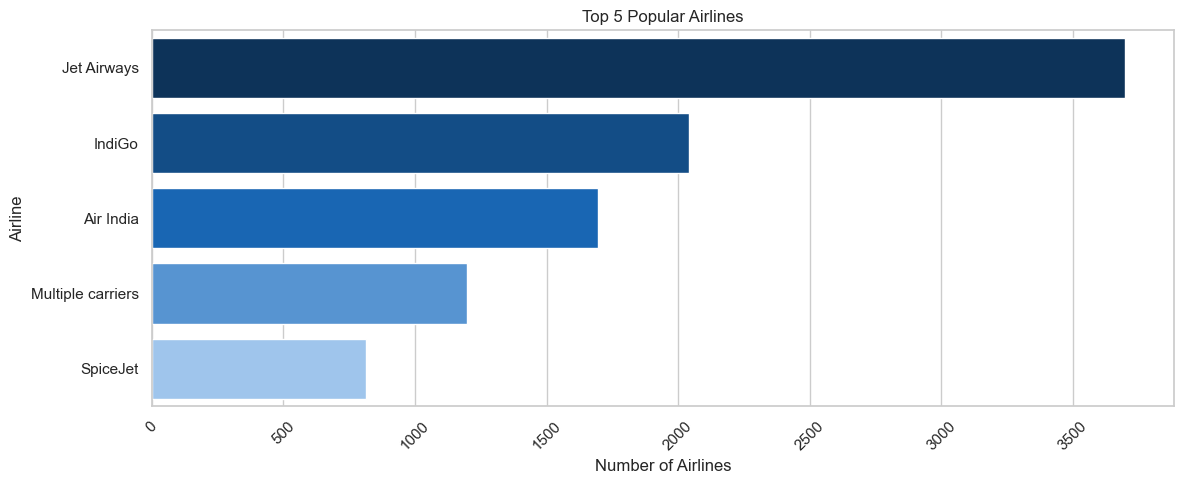

In [99]:
# Top 5 Airlines.

plt.figure(figsize=(12, 5))

# colour palette.
blue_family = ['#003366','#004D99','#0066CC','#4394E5','#92C5F9']

order_des = df['Airline'].value_counts().head(5).index
sns.countplot(y = 'Airline',data=df ,order=order_des, palette=blue_family)
plt.xticks(rotation=45)
plt.xlabel("Number of Airlines")
plt.title("Top 5 Popular Airlines")

plt.tight_layout()
plt.show()

<h3 style="color:crimson;"><center><b>From the above bar chart we can say that, top 5 popular Airlines are--</b></center></h3>
<h4 style="color:#003366;"><center><b> Jet airways, Indigo, AirIndia, Multiple Carriers, Spicejet.</b></center></h4>

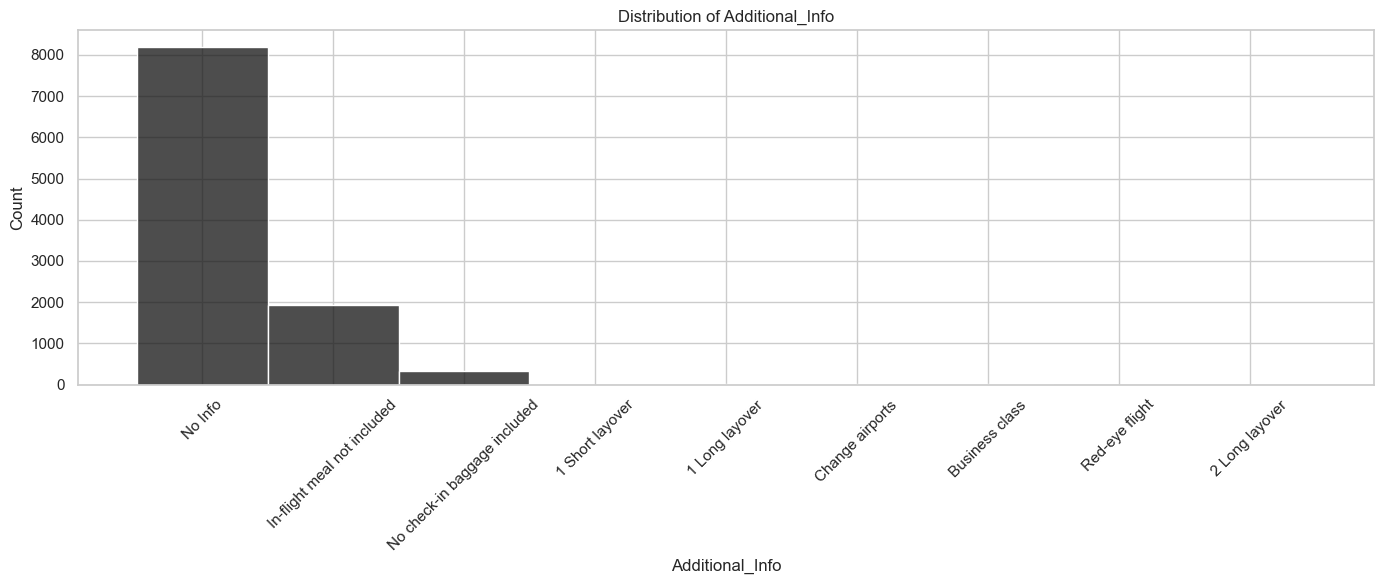

In [101]:
plt.figure(figsize=(14, 6))

sns.histplot(df['Additional_Info'], kde=False, color='#111111')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Distribution of Additional_Info")

plt.tight_layout()
plt.show()

- **We need to drop this column as majority of data shows "No Info" which is useless for model building.**
- We will drop it in the **Final Feature Engineering Part**.

## Bivariate Analysis


- **Price vs Other features**

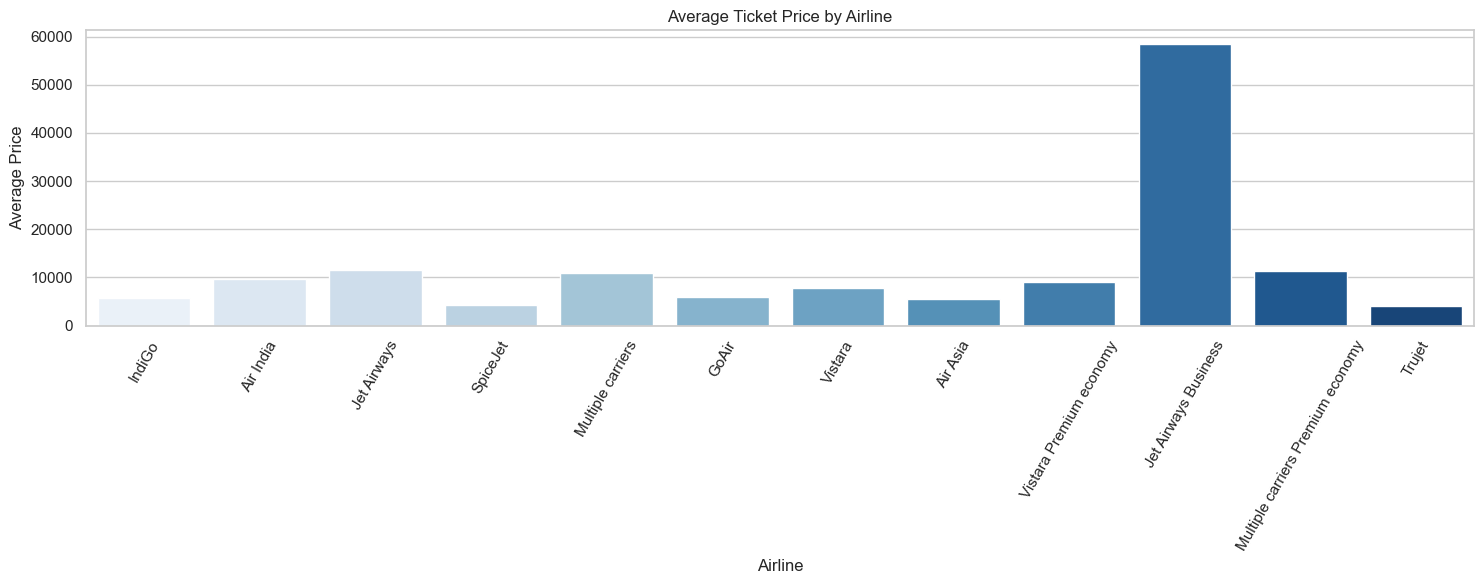

In [105]:
plt.figure(figsize=(15, 6))

sns.barplot(x = 'Airline', y = 'Price', data=df, estimator = np.mean, ci=None, palette = 'Blues')
plt.xticks(rotation=60)
plt.ylabel("Average Price")
plt.title("Average Ticket Price by Airline")

plt.tight_layout()
plt.show()

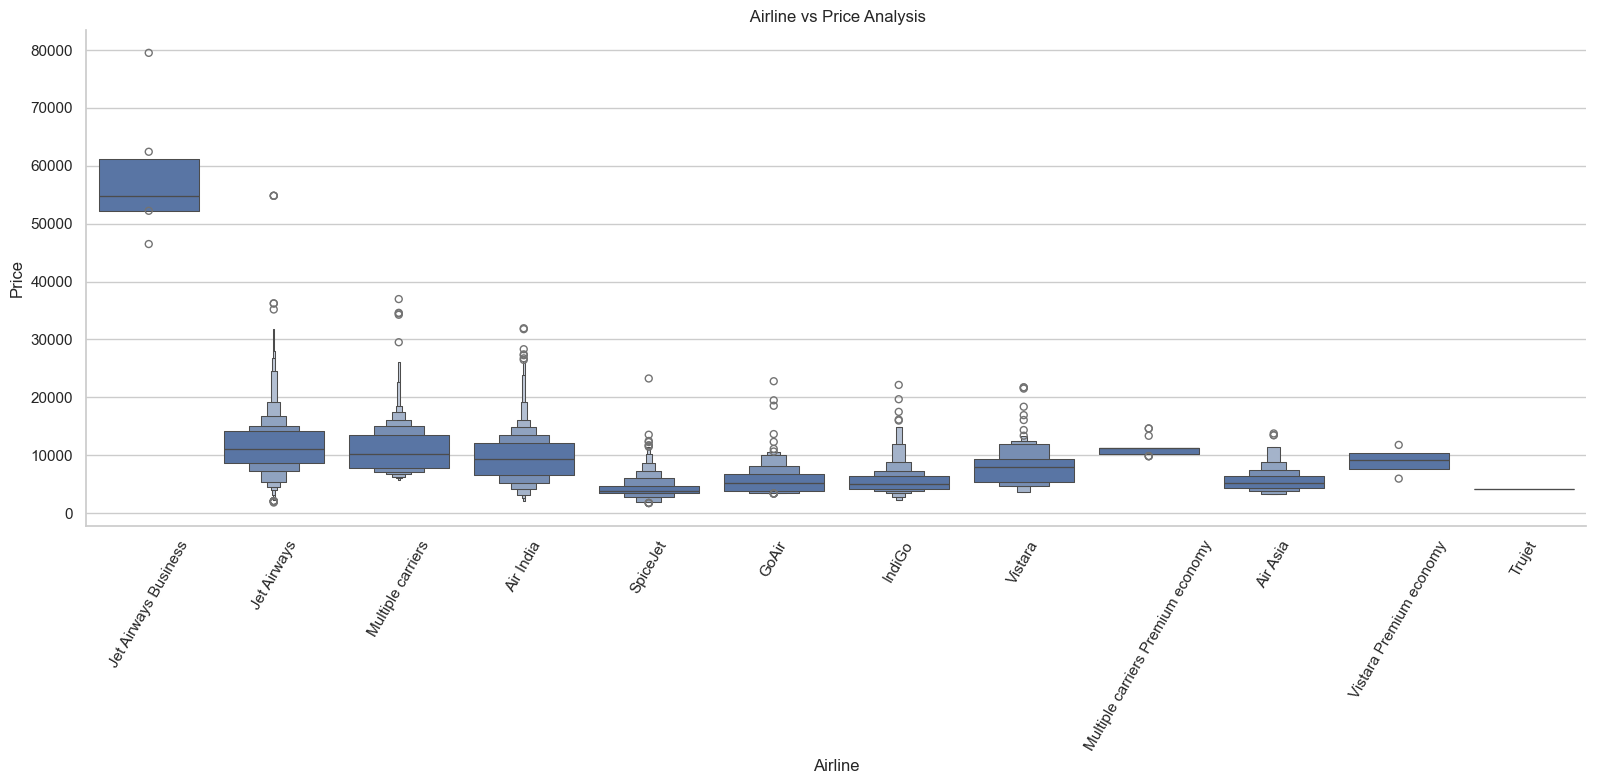

In [106]:

sns.catplot(x = 'Airline', y = 'Price', data=df.sort_values('Price', ascending=False),kind="boxen",height=8, aspect=2)
plt.xticks(rotation=60)
plt.ylabel("Price")
plt.title(" Airline vs Price Analysis")

plt.tight_layout()
plt.show()

**Insight**
- **Jet Airways Business** has the **highest average ticket price** by a large margin, significantly more than all other airlines. Most **economy-class airlines** like **IndiGo, SpiceJet, and GoAir** have relatively low and similar average prices.
- Apart from first all have same median.

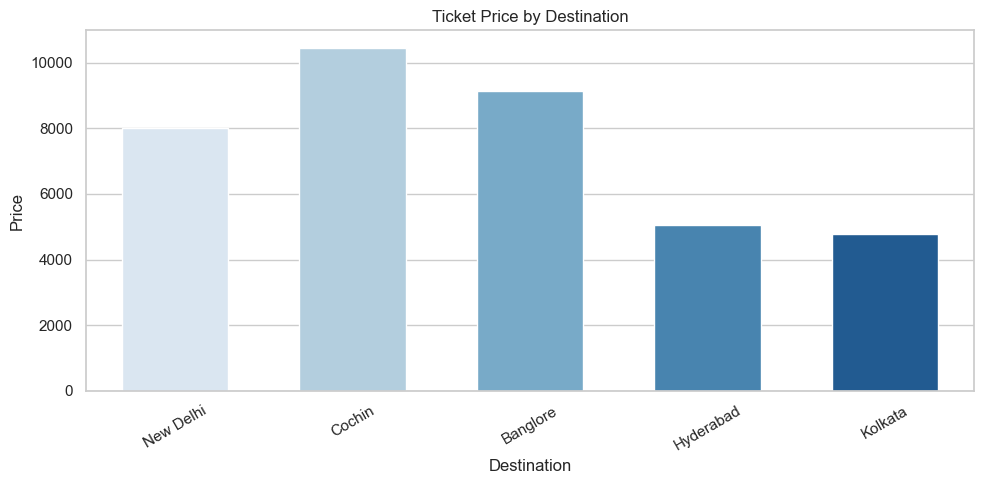

In [108]:
# Destination vs Price

plt.figure(figsize=(10, 5))

sns.barplot(x = 'Destination', y = 'Price', data=df.sort_values('Price', ascending=False), width=0.6, ci=None, palette = 'Blues')
plt.xticks(rotation=30)
plt.ylabel("Price")
plt.title("Ticket Price by Destination")

plt.tight_layout()
plt.show()

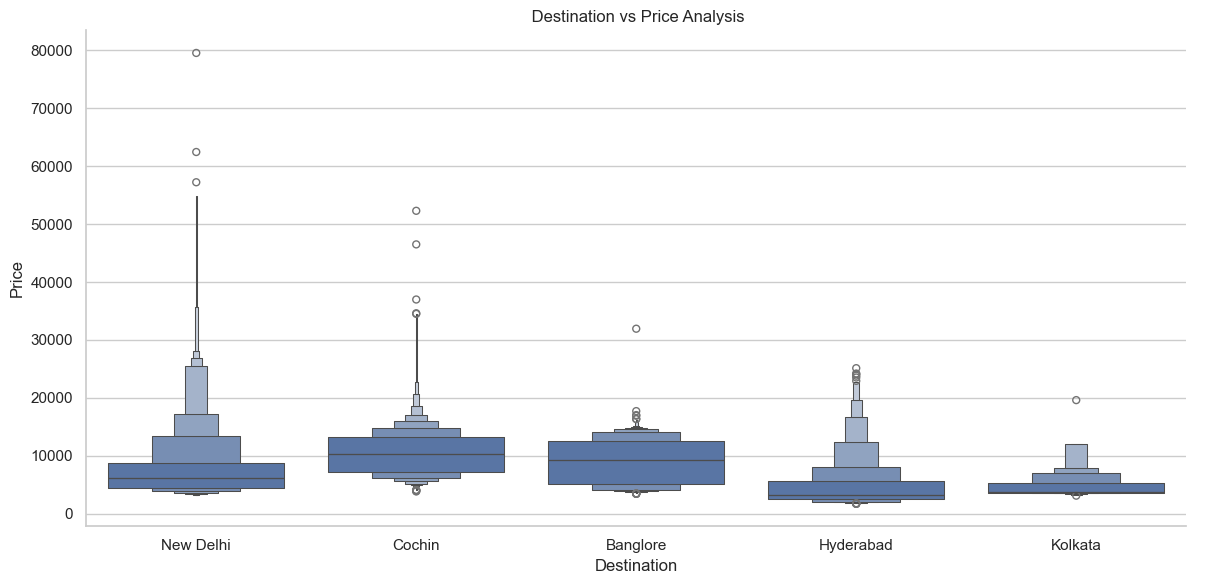

In [109]:
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=2)

plt.title(" Destination vs Price Analysis")

plt.tight_layout()
plt.show()

**Insight**
1. Average Price by Destination (Bar Plot):

- Cochin has the highest average ticket price, followed by Bangalore and New Delhi.
- Hyderabad and Kolkata have significantly lower average prices compared to other destinations.

2. Price Distribution by Destination (Box Plot):

- New Delhi shows a wide range of ticket prices with many high-value outliers.
- Cochin and Bangalore also exhibit substantial price variation, indicating inconsistent pricing.
- Hyderabad and Kolkata have lower and more consistent prices, with fewer outliers and a more compact distribution.

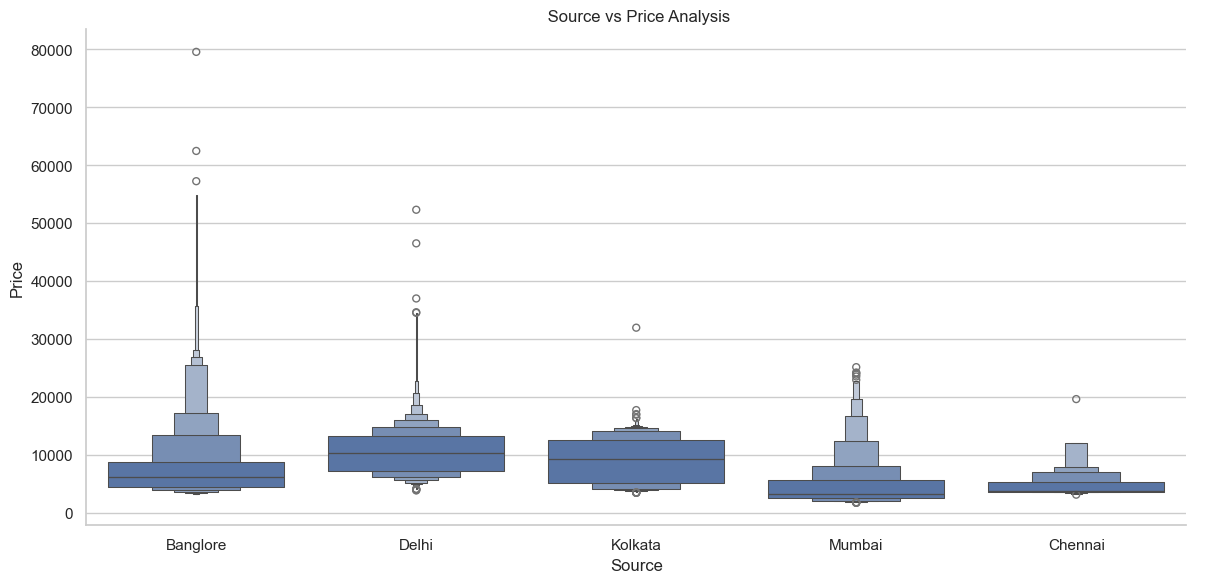

In [111]:
# Source vs Price

sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=2)

plt.title(" Source vs Price Analysis")

plt.tight_layout()
plt.show()

**Insight**
- Delhi and Bangalore have the widest price ranges with many high-priced outliers, indicating variability in ticket costs.
- Chennai shows the lowest and most consistent prices, suggesting more affordable and stable pricing from this source.
- Kolkata and Mumbai have moderate price ranges, with some high-value outliers.

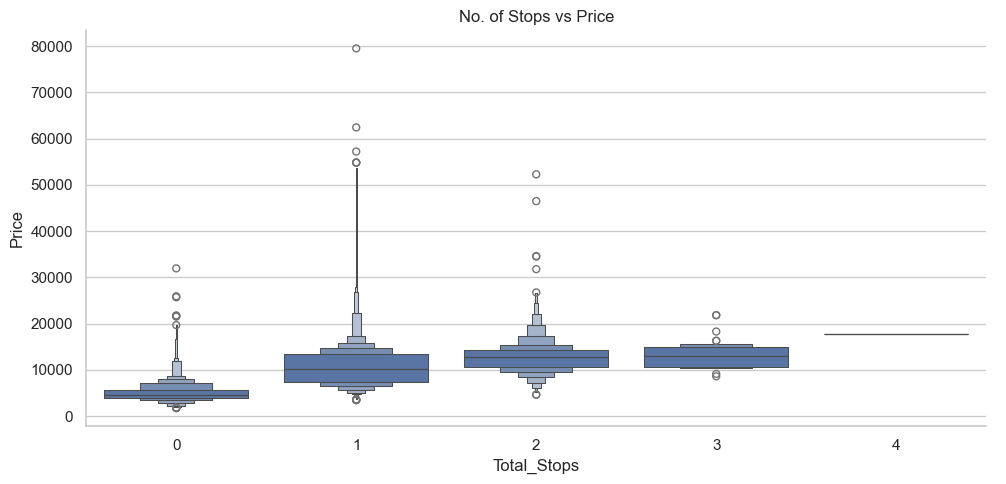

In [113]:
sns.catplot(x = 'Total_Stops', y = 'Price', data=df.sort_values('Price', ascending = False), kind= 'boxen', height=5, aspect=2)
plt.title('No. of Stops vs Price')

plt.tight_layout()
plt.show()

**Insight**
- Ticket prices increase with the number of stops up to 2 stops, but beyond that, the rise is less consistent.
- Non-stop flights (0 stops) tend to be the cheapest and most stable in price.
- 1-stop flights show the widest price variation, including many high-priced outliers.

Text(0, 0.5, 'Average Ticket Price')

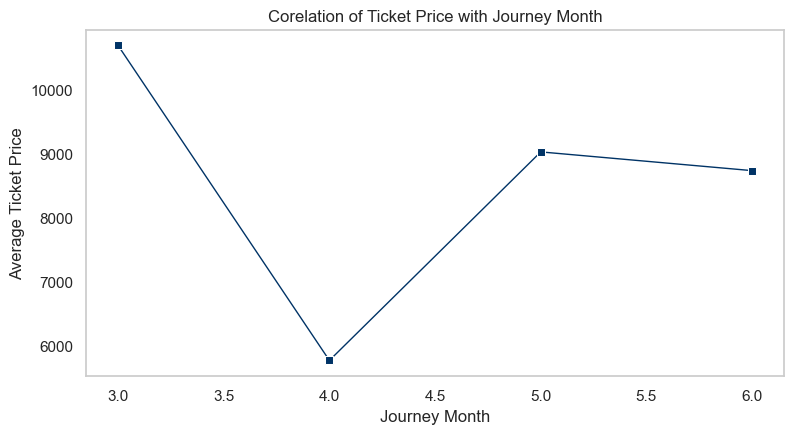

In [115]:
# Journey month relation with Price

plt.figure(figsize=(9, 4.5))
sns.lineplot(x = 'Journey_Month', y = 'Price', data = df, estimator = 'mean', linewidth=1, color='#003366', marker = 's', ci=None)

plt.grid(False)
plt.title("Corelation of Ticket Price with Journey Month")
plt.xlabel("Journey Month")
plt.ylabel("Average Ticket Price")

**Insight**
- It appears that the flight prices were highest in month 3, started to decrease in month 4, and then began to rise again from month 5 until month 6.

Text(0, 0.5, 'Average Ticket Price')

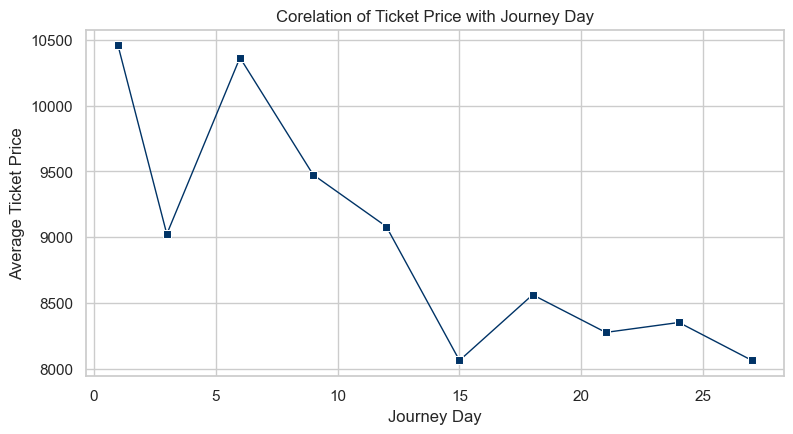

In [117]:
# Journey Day relation with Price

plt.figure(figsize=(9, 4.5))
sns.lineplot(x = 'Journey_Day', y = 'Price', data = df, estimator = 'mean', linewidth=1, color='#003366', marker = 's', ci=None)

plt.grid(True)
plt.title("Corelation of Ticket Price with Journey Day")
plt.xlabel("Journey Day")
plt.ylabel("Average Ticket Price")

**Insight**
- Ticket prices tend to decrease as the journey day increases, showing a negative correlation between journey day and average ticket price.

Text(0, 0.5, 'Average Ticket Price')

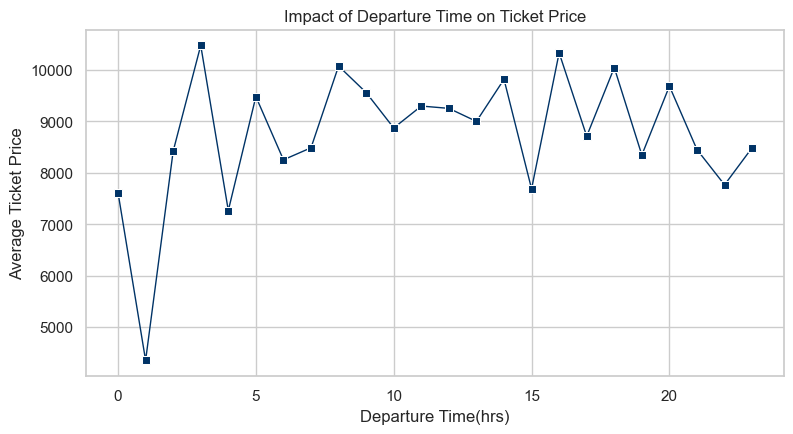

In [119]:
# Departure Time vs Price

plt.figure(figsize=(9, 4.5))
sns.lineplot(x = 'Dep_Time_hrs', y = 'Price', data = df, estimator = 'mean', linewidth=1, color='#003366', marker = 's', ci=None)

plt.grid(True)
plt.title("Impact of Departure Time on Ticket Price")
plt.xlabel("Departure Time(hrs)")
plt.ylabel("Average Ticket Price")

**Insight**
- When the departure time is at 1 hour, the price is the lowest, and for any hour beyond 1, the prices begin to increase.

Text(0, 0.5, 'Average Ticket Price')

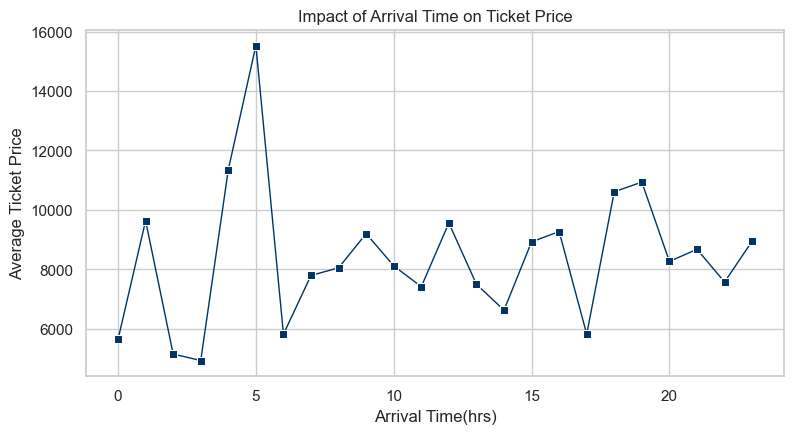

In [121]:
# Arrival Time vs Price

plt.figure(figsize=(9, 4.5))
sns.lineplot(x = 'Arrival_Time_hrs', y = 'Price', data = df, estimator = 'mean', linewidth=1, color='#003366', marker = 's', ci=None)

plt.grid(True)
plt.title("Impact of Arrival Time on Ticket Price")
plt.xlabel("Arrival Time(hrs)")
plt.ylabel("Average Ticket Price")

**Insight**
- The highest prices are observed when the arrival time is at 5 hours. For any hour before or after, the prices tend to be lower or average.

Text(0, 0.5, 'Average Ticket Price')

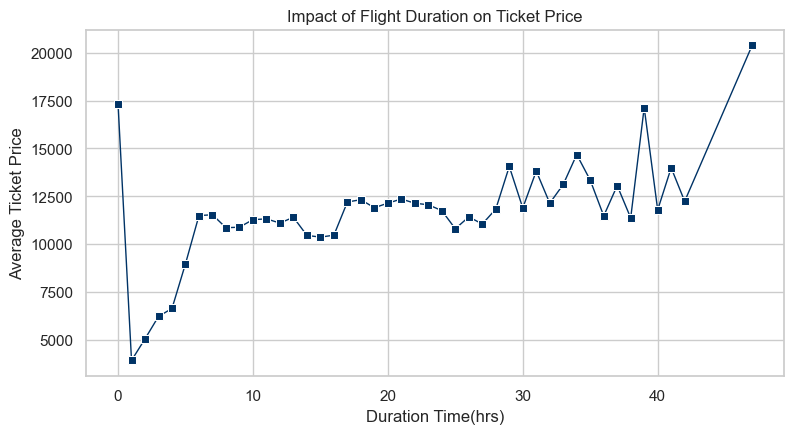

In [123]:
# Let's check relation between duration and price.

plt.figure(figsize=(9, 4.5))
sns.lineplot(x = 'Duration_hrs', y = 'Price', data = df, estimator = 'mean', linewidth=1, color='#003366', marker = 's', ci=None)

plt.grid(True)
plt.title("Impact of Flight Duration on Ticket Price")
plt.xlabel("Duration Time(hrs)")
plt.ylabel("Average Ticket Price")

**Insight**
- As the duration hours increase, the flight prices also tend to increase.

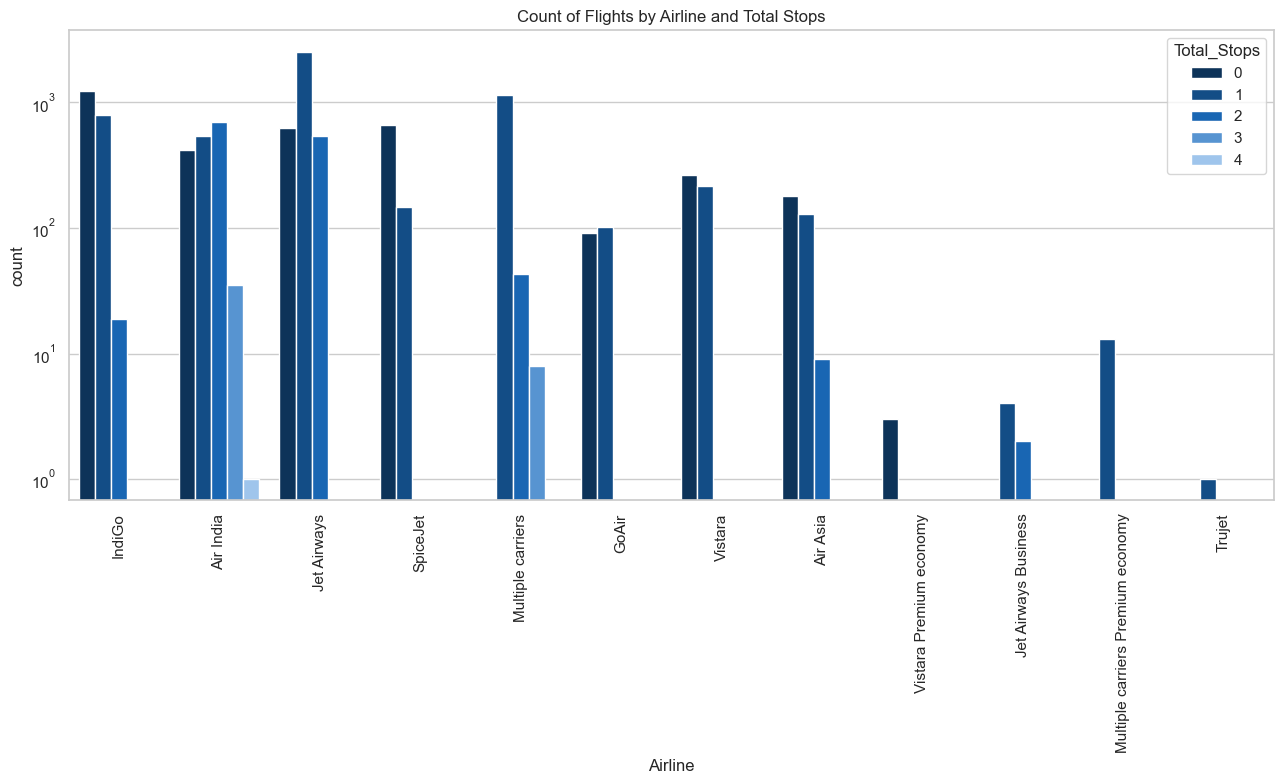

In [125]:
# Airline and total stops distribution

plt.figure(figsize=(13, 8))

sns.countplot(x='Airline',hue='Total_Stops',data=df,dodge=True,palette=blue_family)

plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Count of Flights by Airline and Total Stops")
plt.tight_layout()
plt.show()

**How to read Log-Scale in graph ?**
- I used **logarithmic scale** for yaxis so that it helps to visualize even the airlines and stop combinations with very low flight counts, which would otherwise be hidden on a linear scale.
- If a bar reaches around the level of 
10^2 → it represents ~100 flights.

- If a bar is slightly above 
10^2, it could mean something like 150 or 200 flights.

- If a bar is between 10^2
  and 
10^3, the count is between 100 and 1000.

- If a bar touches 
10^3, it's ~1000 flights.

- Bars below 
10^1(below 10) are very small counts, sometimes just 1 or 2.

**Insight**
1. **Dominant Airlines:**
 - Jet Airways has the highest total flight count, followed by IndiGo and Air India.
 - These three carriers dominate the Indian domestic market in terms of number of flights.

2. **Flight Stop Patterns:**
 - IndiGo operates predominantly non-stop flights (0 stops).
 - Jet Airways shows a mix, but with a large number of 1-stop and 2-stop flights.
 - Air India also has a significant share of multi-stop flights (1 to 3 stops).

3. **Multiple Carriers:**
 - "Multiple Carriers" group has a high number of flights with 2 and 3 stops, indicating connecting flights involving code-sharing between different airlines.

4. **Low-Volume Airlines:**
 - Airlines like Trujet, Jet Airways Business, and Vistara Premium Economy have very few flights, but they still appear due to the log scale.

5. **Rare Cases:**
 - 4-stop flights are extremely rare and are only present in a handful of airline-stop combinations.

<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    🛠️ Final Feature Engineering and Transformation
  </h2>
</div>

In [49]:
## As Additional Info has major data as 'No Info' so let's drop it.

df.drop('Additional_Info', axis=1, inplace=True)

In [51]:
df.sample(2)

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hrs,Duration_mins
5807,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0,2437,1,5,13,15,14,45,1,30
4427,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1,7064,1,4,16,30,22,35,6,5


- **Let's work on Route column.**

In [53]:
df.Route.value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [55]:
df['Route 1'] = df['Route'].str.split('→').str[0]
df['Route 2'] = df['Route'].str.split('→').str[1]
df['Route 3'] = df['Route'].str.split('→').str[2]
df['Route 4'] = df['Route'].str.split('→').str[3]
df['Route 5'] = df['Route'].str.split('→').str[4]

In [134]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hrs,Duration_mins,Route 1,Route 2,Route 3,Route 4,Route 5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [57]:
# Drop the Route column.

df.drop('Route', axis=1, inplace=True)

- ### Missing or Null Values.

In [137]:
df.isna().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Price                   0
Journey_Day             0
Journey_Month           0
Dep_Time_hrs            0
Dep_Time_min            0
Arrival_Time_hrs        0
Arrival_Time_min        0
Duration_hrs            0
Duration_mins           0
Route 1                 0
Route 2                 0
Route 3              3475
Route 4              9100
Route 5             10418
dtype: int64

In [59]:
# Replacing NULL values with NONE.

def replace_null(column_list):
    """This Function replace the Null values with None."""
    for col in column_list:
        df[col].fillna('None', inplace=True)
    return df.head(4)


In [61]:
# Applying function to columns having null.

column_list = ['Route 1','Route 2','Route 3','Route 4','Route 5']
replace_null(column_list)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hrs,Duration_mins,Route 1,Route 2,Route 3,Route 4,Route 5
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,CCU,NAG,BLR,None,None


In [140]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_Day         0
Journey_Month       0
Dep_Time_hrs        0
Dep_Time_min        0
Arrival_Time_hrs    0
Arrival_Time_min    0
Duration_hrs        0
Duration_mins       0
Route 1             0
Route 2             0
Route 3             0
Route 4             0
Route 5             0
dtype: int64

In [141]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Price                int64
Journey_Day          int32
Journey_Month        int32
Dep_Time_hrs         int32
Dep_Time_min         int32
Arrival_Time_hrs     int32
Arrival_Time_min     int32
Duration_hrs         int64
Duration_mins        int64
Route 1             object
Route 2             object
Route 3             object
Route 4             object
Route 5             object
dtype: object

- ## Handlind Outliers
- **IQR Method**

In [63]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers found")
    return

# Applying Function
detect_outliers_iqr(df, 'Price')
detect_outliers_iqr(df, 'Duration_hrs')


Price: 94 outliers found
Duration_hrs: 67 outliers found


In [144]:
# plot for checking outliers.

def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

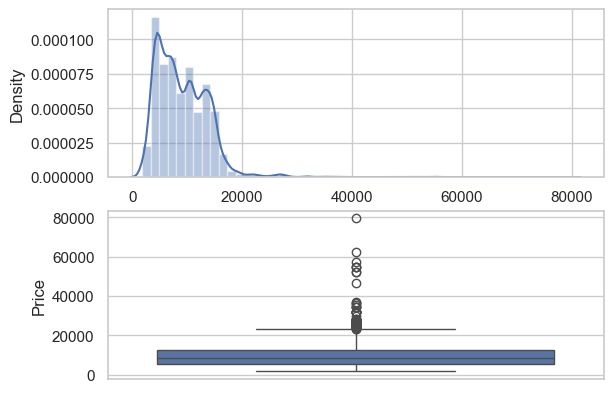

In [145]:
plot(df,'Price')

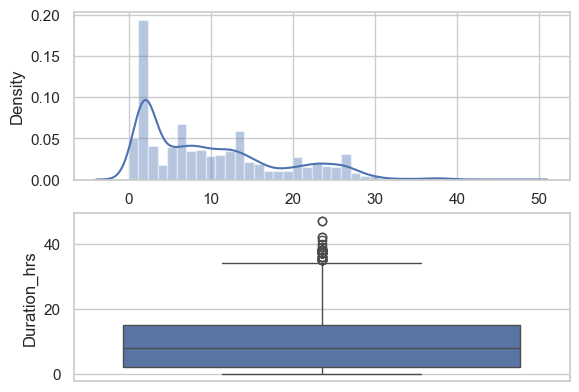

In [146]:
plot(df,'Duration_hrs')

- **Replace outliers with median**

In [65]:
# Price outlier handling

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
median_price = df['Price'].median()
df.loc[df['Price'] > upper_bound, 'Price'] = median_price

In [67]:
# Duration_hrs outlier handling

Q1 = df['Duration_hrs'].quantile(0.25)
Q3 = df['Duration_hrs'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
median_duration = df['Duration_hrs'].median()
df.loc[df['Duration_hrs'] > upper_bound, 'Duration_hrs'] = median_duration

- ## Encoding Categorical Columns
- Columns like Airline, Source, Destination
- We shall use **One Hot Encoding**

In [151]:
cat_columns = ['Airline','Source','Destination']

df_encoded = pd.get_dummies(df, columns = cat_columns, drop_first = True)

In [152]:
df_encoded.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hrs,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,False,True,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,False,True,False,False,True,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,False,True,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


- **Drop Route 1 to Route 5**
- We don't need them as we already have Source, Destination and Total_Stops.

In [154]:
df_encoded.drop(['Route 1','Route 2', 'Route 3', 'Route 4', 'Route 5'], axis=1, inplace=True)

In [155]:
df_encoded.sample()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hrs,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1657,2,9443,12,6,5,0,19,15,8,15,...,False,False,False,True,False,False,True,False,False,False


### HeatMap for Correlation

<Axes: >

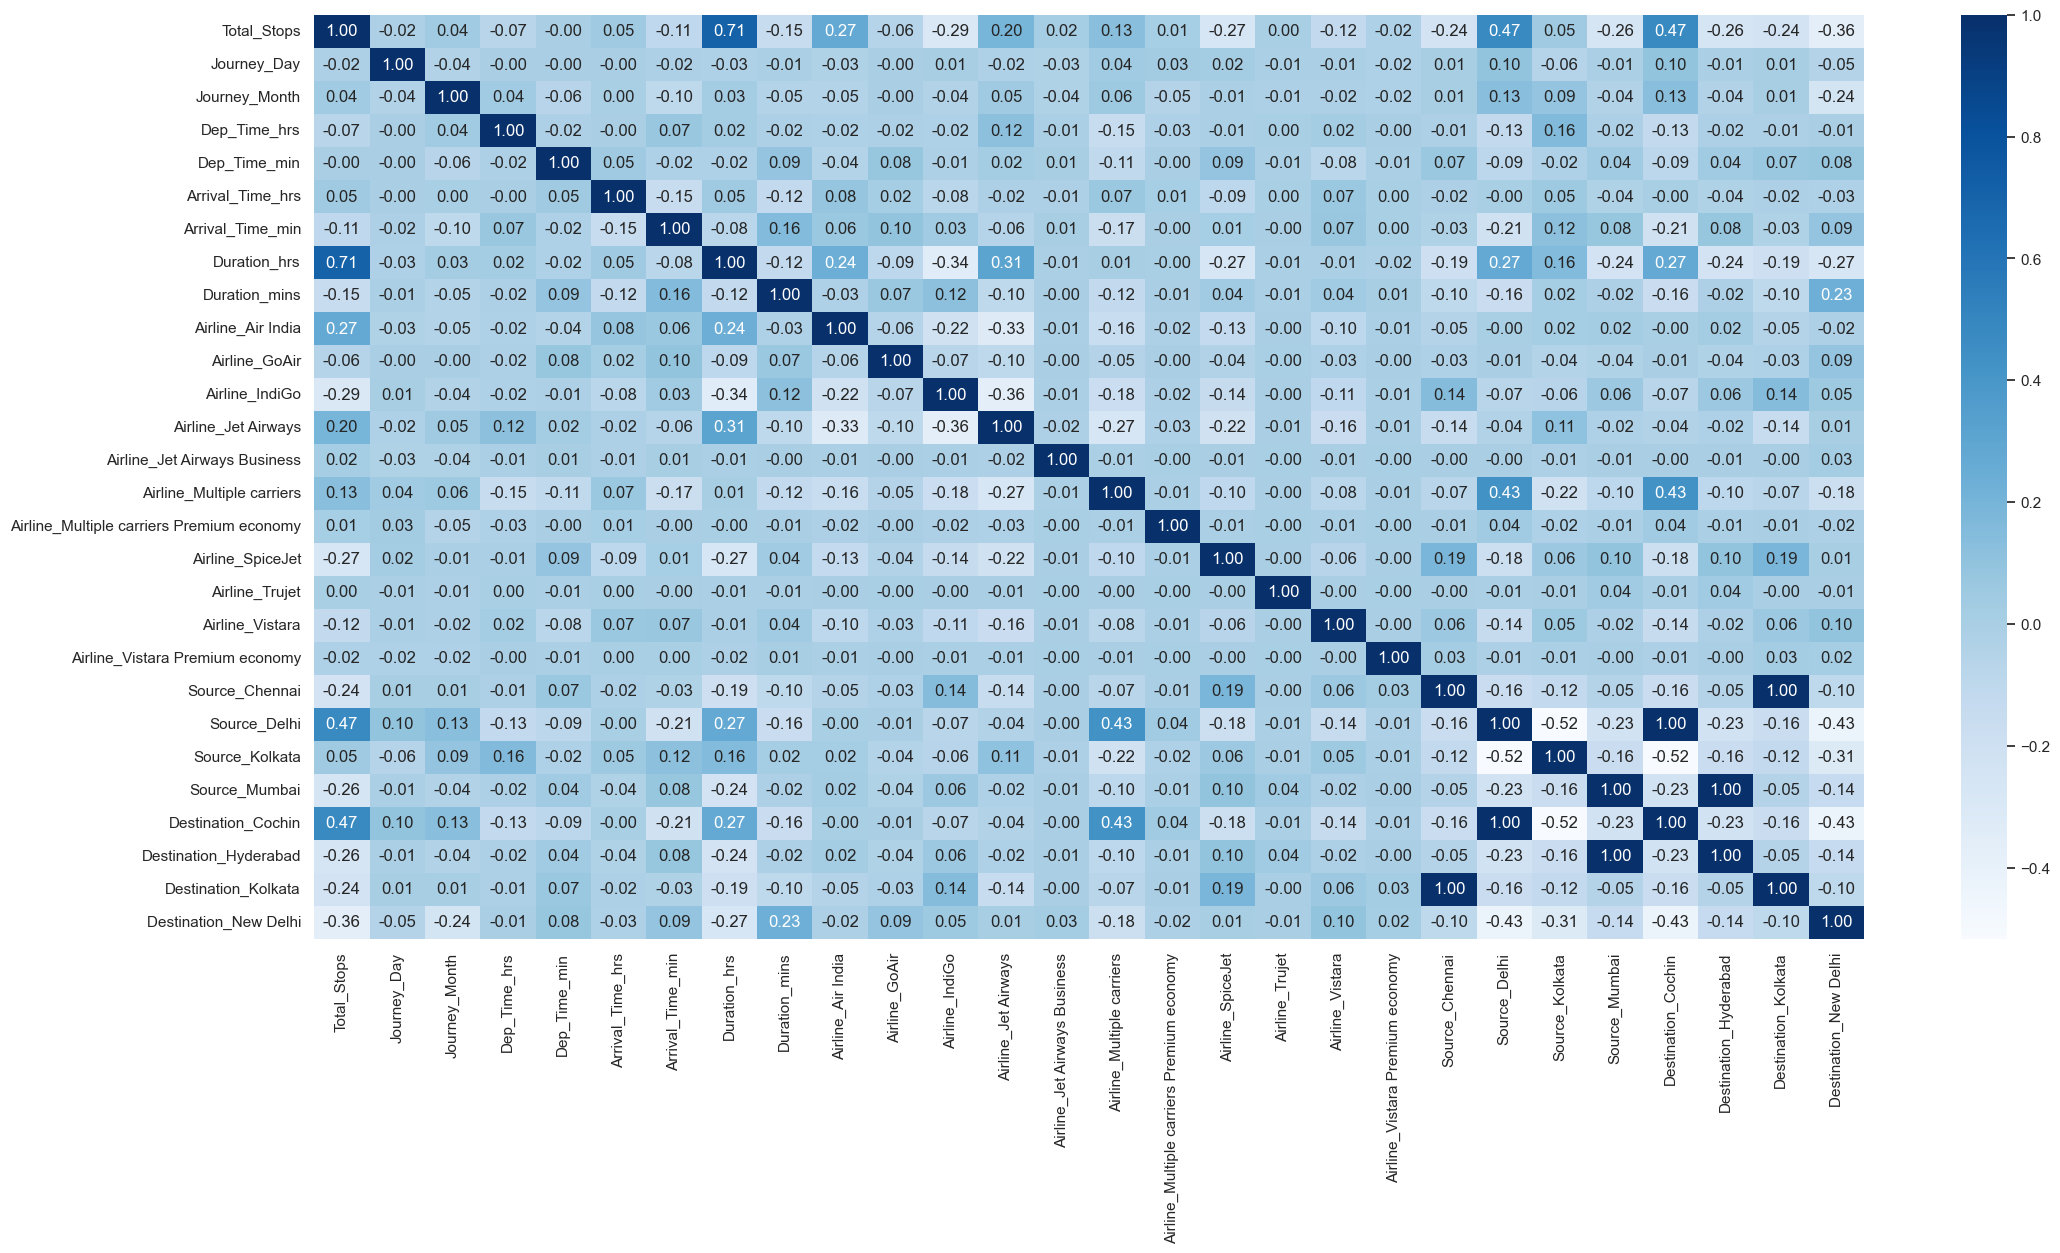

In [157]:
plt.figure(figsize=(25,12))
sns.heatmap(df_encoded.drop('Price', axis=1).corr(), annot=True, fmt='.2f', cmap='Blues')

- ## Train Test Split of Data

In [159]:
X = df_encoded.drop('Price',axis=1)
y = df_encoded['Price']

In [160]:
X.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_Time_hrs',
       'Dep_Time_min', 'Arrival_Time_hrs', 'Arrival_Time_min', 'Duration_hrs',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [161]:
X.shape, y.shape

((10462, 28), (10462,))

In [162]:
# Now splitting 80% training 20% testing

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.20 ,random_state = 42)

print(f"Traininig Set has {X_train.shape[0]} samples.")
print(f"Testing Set has {X_test.shape[0]} samples.")

Traininig Set has 8369 samples.
Testing Set has 2093 samples.


<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    🤖 Model Building and Evaluation
  </h2>
</div>

- ## Creating Pipeline

In [165]:
from sklearn.compose import ColumnTransformer

# Numerical feature for scaling
numeric_features = ['Journey_Day', 'Journey_Month', 'Dep_Time_hrs', 'Dep_Time_min', 'Arrival_Time_hrs', 'Arrival_Time_min',
                    'Duration_hrs', 'Duration_mins']

# Column Transformer to scale only numeric columns
preprocessor = ColumnTransformer([('num', StandardScaler(), numeric_features)], remainder = 'passthrough')



In [166]:
regressor_models = [
    ("Linear Regression", LinearRegression(n_jobs=-1)),
    ("k-Nearest Neighbors", KNeighborsRegressor(n_neighbors=5, n_jobs=-1)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42, n_jobs=-1)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42, n_jobs=-1))
]

result = []
mean_test_r2_score = []
cross_val_errors = []
regressor_name = []

for model_name, model in regressor_models:
    # Creating pipeline for each model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1, return_train_score=True)
    
    # Cross validation errors
    error_val = 1 - np.mean(cv_results['test_score'])

    #saving results in list
    result.append({"Model Name": model_name, "Mean Train R2 Score": np.mean(cv_results['train_score']),
        "Mean Test R2 Score": np.mean(cv_results['test_score']), "Cross-Validation Error": error_val})
    
    mean_test_r2_score.append(np.mean(cv_results['test_score']))
    cross_val_errors.append(error_val)
    regressor_name.append(model_name)


In [167]:
result_df = pd.DataFrame(result)
result_df.sort_values(by="Mean Test R2 Score", ascending=False, inplace=True)
display(result_df)

,Model Name,Mean Train R2 Score,Mean Test R2 Score,Cross-Validation Error
5,XGBoost,0.925143,0.818330,0.181670
3,Random Forest,0.950693,0.794902,0.205098
4,Gradient Boosting,0.758160,0.744390,0.255610
1,k-Nearest Neighbors,0.823884,0.726621,0.273379
2,Decision Tree,0.968415,0.673481,0.326519
0,Linear Regression,0.632836,0.630276,0.369724


- ### Plot Showing Model Performance

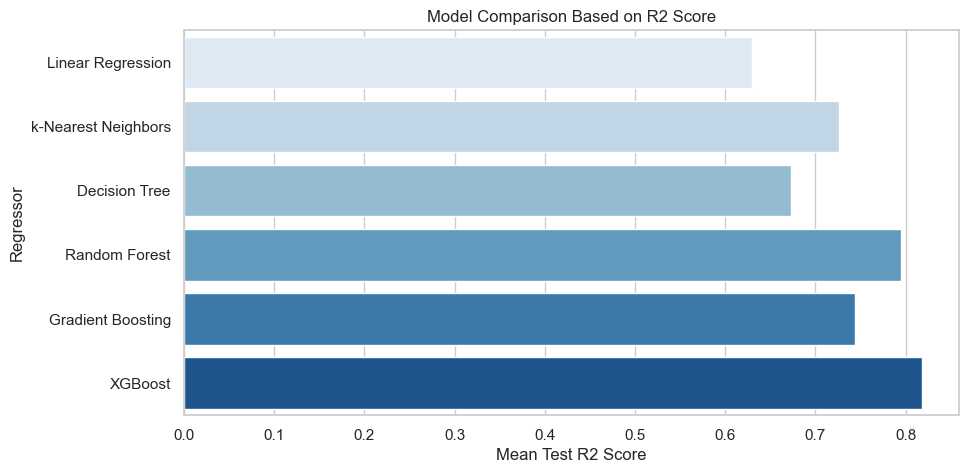

In [169]:
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_test_r2_score, y=regressor_name, palette='Blues')
plt.xlabel("Mean Test R2 Score")
plt.ylabel("Regressor")
plt.title("Model Comparison Based on R2 Score")
plt.show()

<h3 style="color:crimson;"><center><b>From the above bar chart we can say that--</b></center></h3>
- **The XGBoost Regressor emerged as the top-performing model, showcasing strong predictive power with impressive Mean Train and Test R2 Accuracy scores. Its minimal Cross-Validation Error further validated its robustness, making it the chosen model for our analysis.**

### <span style="color:crimson;"><center>**From the above bar chart we can say that--**</center></span>

- **The XGBoost Regressor emerged as the top-performing model, showcasing strong predictive power with impressive Mean Train and Test R2 Accuracy scores. Its minimal Cross-Validation Error further validated its robustness, making it the chosen model for our analysis.**


<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    🎯 Hyperparameter Tuning [XG BOOST]
  </h2>
</div>

- ## Grid Search CV

In [174]:
xgb = XGBRegressor(random_state=42)

xgb_grid = {'regressor__learning_rate': [0.1, 0.2, 0.3],  
    'regressor__n_estimators': [200, 300, 400],  
    'regressor__max_depth': [5, 6, 7],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]}

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', xgb)
    ])

grid_search = GridSearchCV(estimator=pipeline, param_grid=xgb_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Params:", best_params)
print("Best R2 Score:", best_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 6, 'regressor__n_estimators': 200, 'regressor__subsample': 1.0}
Best R2 Score: 0.8268986225128174


In [175]:
# Final Model

final_xgb_model = grid_search.best_estimator_

In [176]:
test_score = final_xgb_model.score(X_test, y_test)
print("Test R2 Score on Separate Test Set:", test_score)

Test R2 Score on Separate Test Set: 0.8408397436141968


In [177]:
print(' XGBoost Model - Final Evaluation\n')

model = final_xgb_model

# Evaluation on training data
print("Training Score (R²): {:.4f}".format(model.score(X_train, y_train)))

# Predictions on test set
predictions = model.predict(X_test)
print("Sample Predictions:", predictions[:5])

# Evaluation Metrics
r2score = r2_score(y_test, predictions)
print("\n R² Score on Test Set: {:.4f}".format(r2score))
print(" MAE: {:.2f}".format(mean_absolute_error(y_test, predictions)))
print(" MSE: {:.2f}".format(mean_squared_error(y_test, predictions)))
print(" RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, predictions))))

 XGBoost Model - Final Evaluation

Training Score (R²): 0.8973
Sample Predictions: [16530.309   3883.8857  4448.8564  4509.513   4234.7915]

 R² Score on Test Set: 0.8408
 MAE: 1123.65
 MSE: 2592625.59
 RMSE: 1610.16


In [178]:
# Prediction
prediction = model.predict(X_test)

# Calculating Residuals
residuals = y_test - prediction


In [297]:
# pickle file
# Save the trained model

import pickle
with open('Flight_price_prediction_model.pickle','wb') as f:
    pickle.dump(final_xgb_model,f)

#JSON

# Save the columns to JSON (for Flask app to map inputs correctly)
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

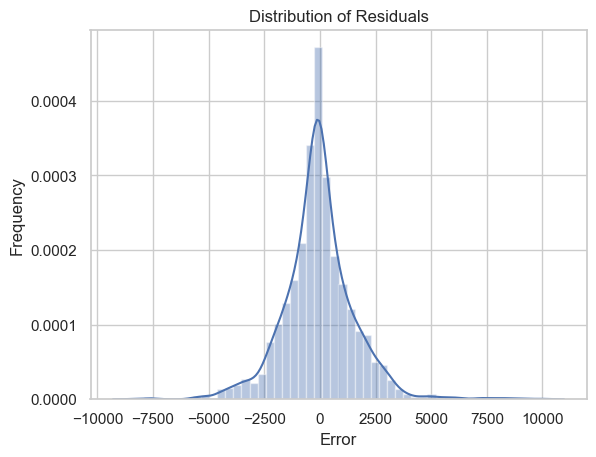

In [179]:
# Plot Distribution.

sns.distplot(residuals)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

- **Insight from the Residual Plot**
- The **distribution** of residuals is approximately **centered around zero** and appears **roughly bell-shaped**, indicating that the errors are symmetrically distributed. This **suggests** that the **XGBoost model** is **making unbiased predictions** and is performing well without major systematic errors.

## Residuals vs. Predicted Values Scatter Plot

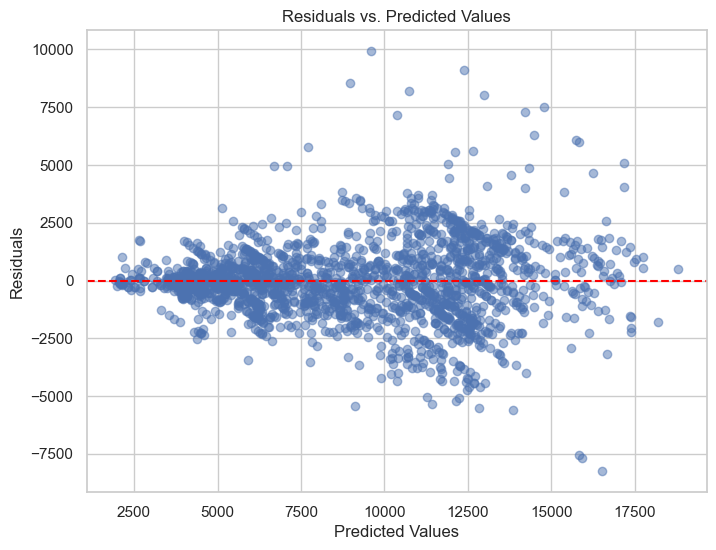

In [182]:
plt.figure(figsize=(8, 6))
plt.scatter(prediction, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

### Insight from Residual vs Predicted
- The residuals are spread somewhat evenly around the red line (y=0), but we can see a funnel shape — indicating heteroscedasticity.
- This means the variance of residuals increases with the predicted value, which can violate the assumption of constant variance in errors.
- Non-random patterns or clustering may indicate that the model is missing some structure in the data.

## Q-Q Plot

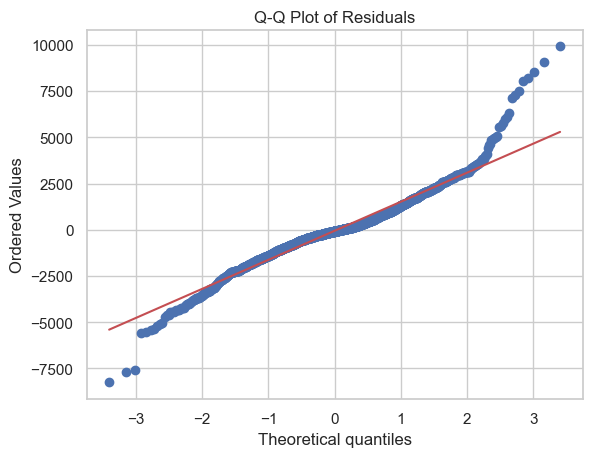

In [185]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(y_test - prediction, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

### Insight from Q-Q Plot
- The Q-Q plot shows that residuals largely follow the normal distribution (along the red line), but deviations at the tails indicate heavy-tailed errors (possible outliers).
- This suggests that while most errors are normal, extreme prediction errors are more common than expected under normality.

<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    📌 Summary from the E.D.A
  </h2>
</div>

* Large concentration of flight prices between 2,000 and 15,000.
* The prices above 30,000 are very rare and could be outliers or business class/premium fares
* Journey months 5(May) and 6(June) have the highest counts, while month 4 has the lowest counts.
* Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low.
* The Top 3 source of flights from Delhi, Kolkata, Banglore.
* The Top 3 Destination of flights are Cochin, Banglore, New Delhi.
* Jet Airways Business has the highest average ticket price by a large margin, significantly more than all other airlines. 
* Most economy-class airlines like IndiGo, SpiceJet, and GoAir have relatively low and similar average prices.

<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    📊 Model Comparison Report
  </h2>
</div>


### Objective:
To predict **flight fares** based on various features like airline, source, destination, journey time, number of stops, etc.

---

### 🔍 Models Evaluated:

| Model                 | R² Score (Train) | R² Score (Test) | CV Error | 
|-----------------------|------------------|-----------------|----------|
| XGBoost	            | 0.8973   |	0.8408   |	0.181670     | 
| Random Forest	        | 0.9506   |	0.7949   |	0.205098     |
| Gradient Boosting     | 0.7581   |	0.7443   |	0.255610     | 
| k-Nearest Neighbors   | 0.8238   |	0.7266   |	0.273379     |
| Decision Tree	        | 0.9684   |	0.6734   |	0.326519     | 
| Linear Regression	    | 0.6328   |	0.6302   |	0.369724     | 

---

### ✅ Best Model Recommendation

**XGBoost Regressor** is the **best performing model** in terms of:
- Highest **R² score on test set**
- Lowest **RMSE** and **MAE**
- Handles both linear and non-linear relationships well
- Robust to outliers and missing patterns
  
XGBoost builds trees iteratively and focuses on optimizing the model’s error with regularization, reducing overfitting and improving generalization.

<div style="
    background-color: #cceeff; 
    padding: 15px; 
    border-radius: 12px; 
    text-align: center;
">
  <h2 style="
      color: #003344; 
      font-family: 'Trebuchet MS', sans-serif; 
      font-weight: 600;
      margin: 0;
  ">
    🧱 Challenges Faced During Data Processing
  </h2>
</div>


### 1.  Missing Values
- **Problem**: Two null values found in the dataset.
- **Solution**: Dropped them due to small count and minimal impact.

### 2.  Duplicate Entries
- **Problem**: Duplicate rows can cause data leakage and overfitting.
- **Solution**: Removed exact duplicates using `drop_duplicates()`.

### 3.  Date-Time Columns
- **Problem**: `Date_of_Journey`, `Dep_Time`, `Arrival_Time` were in object format and hard to model.
- **Solution**: Converted to datetime format and extracted useful features like:
  - `Journey_Day`, `Journey_Month`
  - `Dep_Time_hrs`, `Dep_Time_min`
  - `Arrival_Time_hrs`, `Arrival_Time_min`

### 4.  Duration Format
- **Problem**: The `Duration` column had inconsistent string formats like `"2h 50m"`, `"1h"`, `"50m"`.
- **Solution**: Created a function to parse hours and minutes separately into `Duration_hrs` and `Duration_mins`.

### 5.  Categorical Variables
- **Problem**: Columns like `Airline`, `Source`, `Destination` had non-numeric values.
- **Solution**: Applied **One-Hot Encoding** to convert them into numerical features suitable for ML models.

### 6.  Target Skewness
- **Problem**: `Price` might be right-skewed due to high-cost flights.
- **Solution**: Considered using **log transformation** (if done — if not, consider it for future improvement).

---

##  Final Notes

- ✅ **Train-test split** and **cross-validation** were used to ensure reliable performance.
- ✅ **GridSearchCV** helped in fine-tuning the XGBoost model parameters.

---

## 📌 Summary

- **Best Model**: `XGBoost Regressor`
- **Reason**: Best generalization, low error, high accuracy
- **Improvements Done**: Time feature extraction, encoding, cleaning
